In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

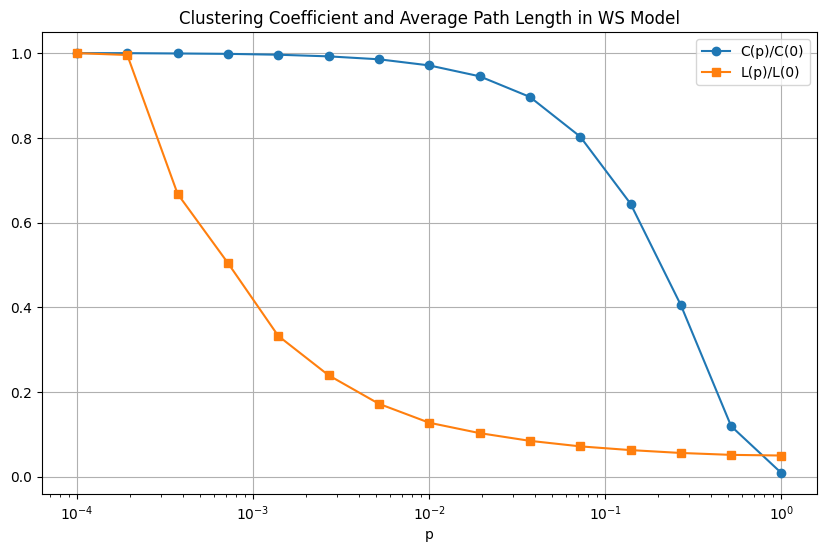

In [4]:
n_ws = 2000
k = 12
n_runs = 7

p_values = np.logspace(-4, 0, num=15, base =10)

avg_clustering = []
avg_path_length = []

for p in p_values:
    clustering_runs = []
    path_length_runs = []
    effective_runs = 0
    while effective_runs < n_runs:
        G = nx.watts_strogatz_graph(n_ws, k, p)
        if nx.is_connected(G):
            clustering_runs.append(nx.average_clustering(G))
            path_length_runs.append(nx.average_shortest_path_length(G))
            effective_runs +=1

    avg_clustering.append(np.mean(clustering_runs))
    avg_path_length.append(np.mean(path_length_runs))

c0 = avg_clustering[0]
l0 = avg_path_length[0]

normalized_clustering = [c / c0 for c in avg_clustering]
normalized_path_length = [l / l0 for l in avg_path_length]

plt.figure(figsize=(10, 6))
plt.plot(p_values, normalized_clustering, 'o-', label='C(p)/C(0)')
plt.plot(p_values, normalized_path_length, 's-', label='L(p)/L(0)')
plt.xscale('log')
plt.xlabel('p')
plt.title('Clustering Coefficient and Average Path Length in WS Model')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
n_er = 15000
n_runs = 10
avg_sh_path_len = []
avg_std_sh_path = []
epsilon = 0.001

n_values = np.logspace(0, np.log10(n_er), num=15, base=10) 
for n in n_values:
    p = (1+epsilon) * np.log(n) / n
    effective_runs = 0
    sh_path_len_run = []
    while effective_runs < n_runs:
        G = nx.erdos_renyi_graph(int(n), p)
        if nx.is_connected(G):
            sh_path_len_run.append(nx.average_shortest_path_length(G))
            effective_runs += 1

    avg_sh_path_len.append(np.mean(sh_path_len_run))
    avg_std_sh_path.append(np.std(sh_path_len_run))

plt.figure(figsize=(10, 6))
plt.errorbar(n_values, avg_sh_path_len, yerr=avg_std_sh_path, fmt='o-', capsize=5)
plt.xscale('log')
plt.xlabel('Number of nodes (n)')
plt.ylabel('Average shortest path length')
plt.title('Average Shortest Path Length vs Number of Nodes in ER Model')
plt.grid(True)
plt.show()